# Pipeline Definitivo: EDA y Análisis Comparativo de Clustering para Perfiles de Motivación

**Objetivo:** Realizar un análisis de punta a punta para segmentar a los estudiantes del semillero MAMBA. Este notebook se divide en dos partes principales:
1.  **Análisis Exploratorio de Datos (EDA):** Para entender las distribuciones, relaciones y, fundamentalmente, justificar la necesidad de un enfoque de clustering al demostrar la existencia de heterogeneidad en la población.
2.  **Análisis Comparativo de Clustering:** Para aplicar 5 algoritmos de clustering, evaluarlos cuantitativamente con múltiples métricas y cualitativamente a través de la interpretación de los perfiles resultantes.

## Parte 1: Análisis Exploratorio de Datos (EDA) - ¿Por qué Clustering?

Antes de agrupar, debemos entender los datos. Si todos los estudiantes fueran similares, un análisis de promedios sería suficiente. El objetivo de este EDA es demostrar que existen distintos patrones de comportamiento y motivación, lo que hace que la segmentación (clustering) sea un enfoque valioso.

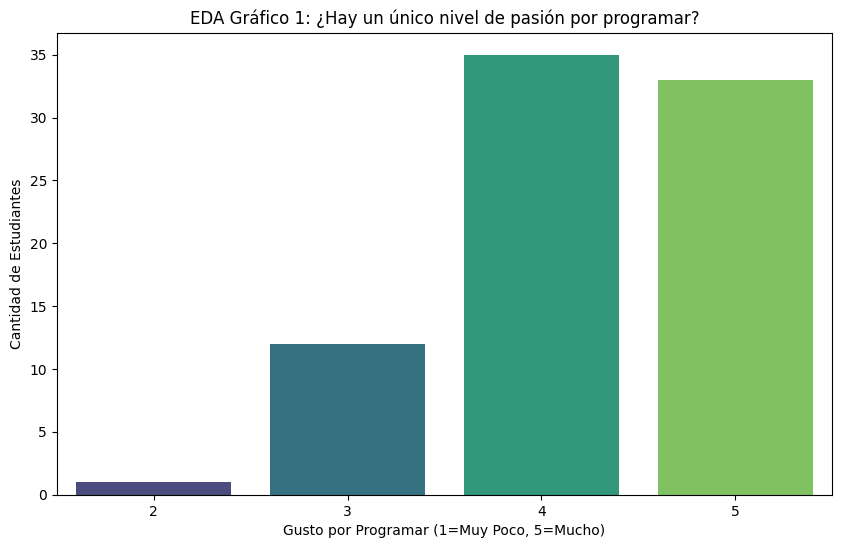

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Cargar datos
file_path = 'RespuestasSemillero.xlsx'
df = pd.read_excel(file_path)

# Gráfico 1: Distribución del Gusto por Programar (Q6)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Q6', palette='viridis')
plt.title('EDA Gráfico 1: ¿Hay un único nivel de pasión por programar?')
plt.xlabel('Gusto por Programar (1=Muy Poco, 5=Mucho)')
plt.ylabel('Cantidad de Estudiantes')
plt.show()


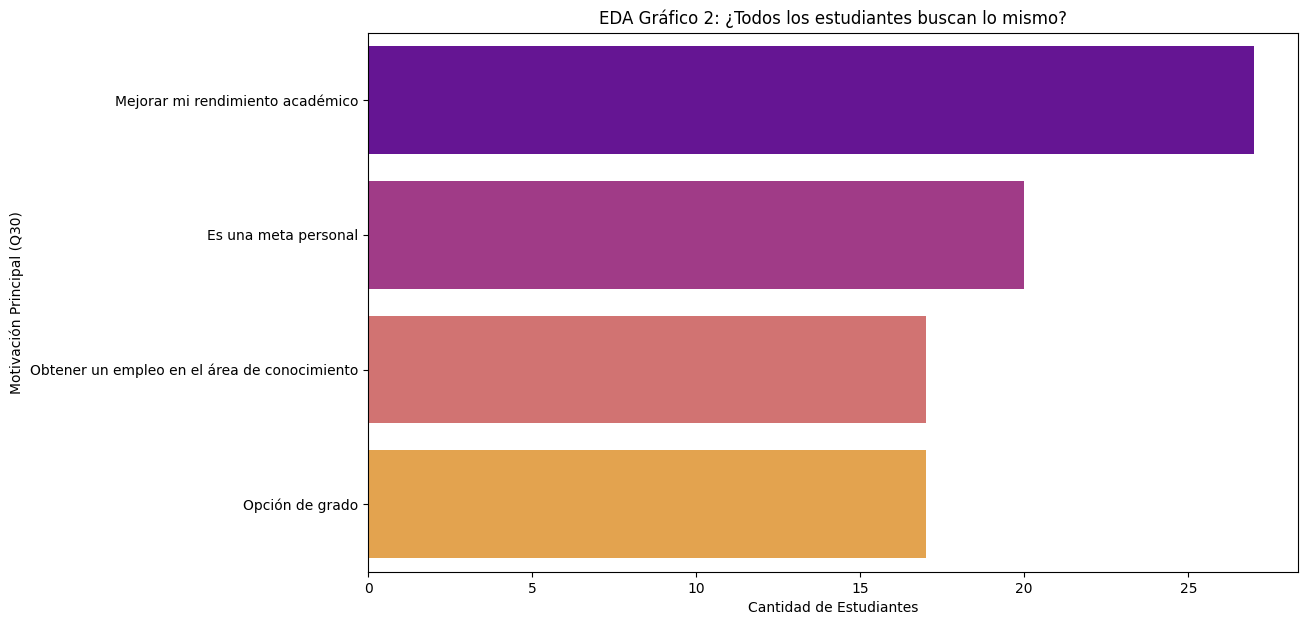

In [9]:
# Gráfico 2: Motivaciones Principales para Ingresar al Semillero (Q30)
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='Q30', palette='plasma', order = df['Q30'].value_counts().index)
plt.title('EDA Gráfico 2: ¿Todos los estudiantes buscan lo mismo?')
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Motivación Principal (Q30)')
plt.show()


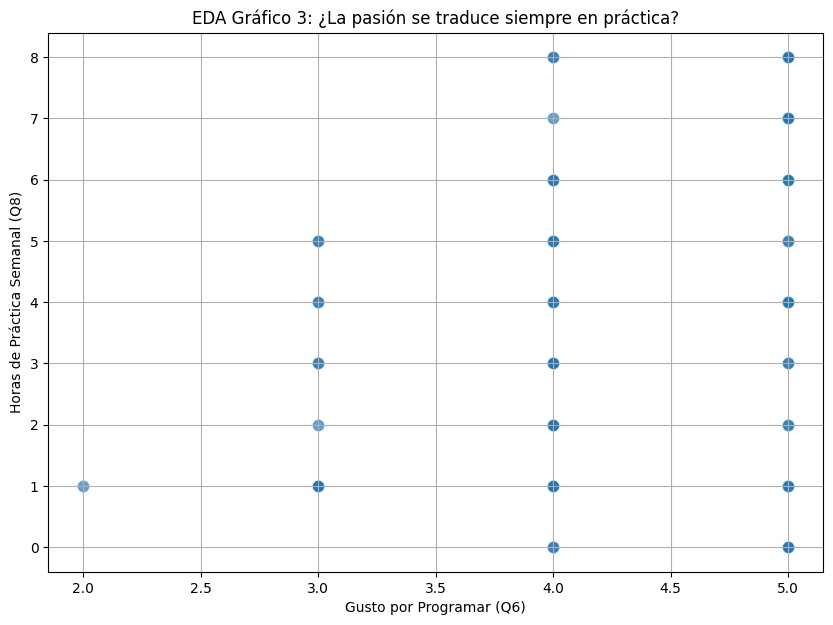

In [10]:
# Gráfico 3: Relación entre Gusto por Programar y Horas de Práctica
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Q6', y='Q8', alpha=0.7, s=80)
plt.title('EDA Gráfico 3: ¿La pasión se traduce siempre en práctica?')
plt.xlabel('Gusto por Programar (Q6)')
plt.ylabel('Horas de Práctica Semanal (Q8)')
plt.grid(True)
plt.show()


### Conclusión del EDA
Los gráficos anteriores demuestran que la población de estudiantes no es homogénea. Existen diferentes motivaciones, niveles de pasión y hábitos de estudio. Un análisis de promedios ocultaría esta riqueza. Por lo tanto, **un enfoque de clustering está justificado** para identificar y caracterizar estos subgrupos de manera formal.

## Parte 2: Preparación de Datos y Análisis Comparativo de Clustering

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Seleccionar características, codificar y escalar (como antes)
features_for_clustering = ['Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q23', 'Q25', 'Q30', 'Q31']
df_motivation = df[features_for_clustering].copy()
df_processed = pd.get_dummies(df_motivation, columns=['Q10', 'Q30', 'Q31'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_processed)

# PCA para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

print("Datos listos para el clustering.")

Datos listos para el clustering.


--- Ejecutando K-Means ---


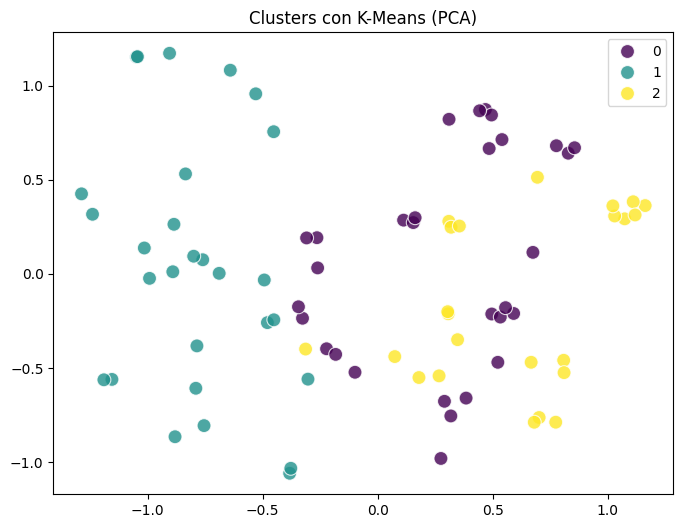

--- Ejecutando Agglomerative ---


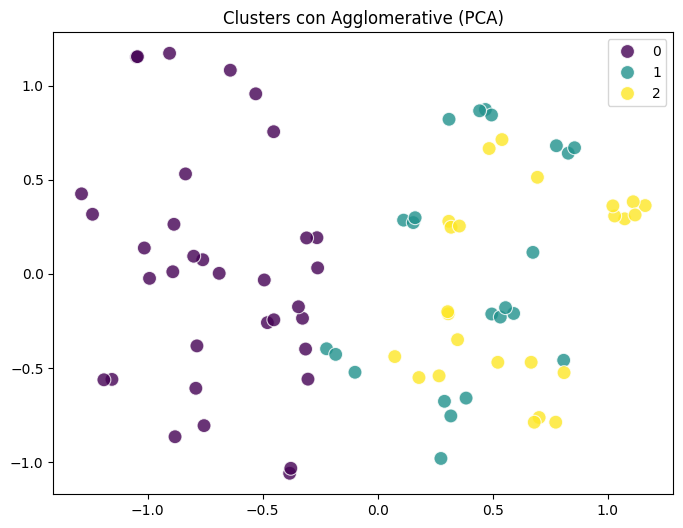

--- Ejecutando GMM ---


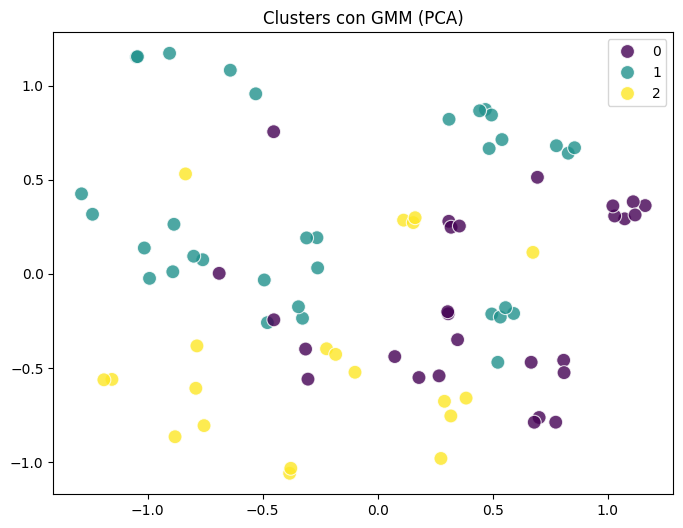

--- Ejecutando Spectral ---


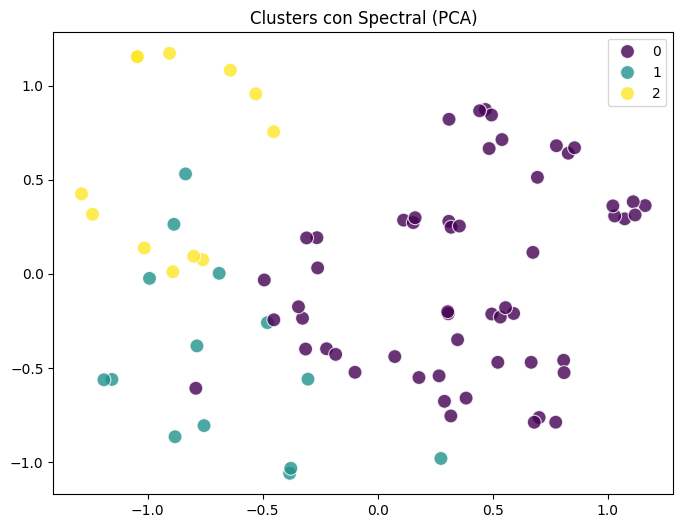

--- Ejecutando DBSCAN ---


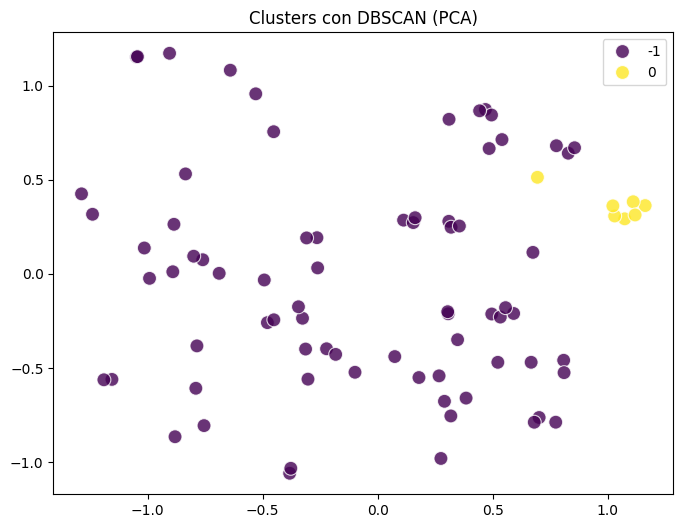

In [12]:
# Diccionario para almacenar modelos y resultados
results = {}

# --- Algoritmos ---
n_clusters = 3 # Basado en EDA
models = {
    'K-Means': KMeans(n_clusters=n_clusters, random_state=42, n_init=10),
    'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
    'GMM': GaussianMixture(n_components=n_clusters, random_state=42),
    'Spectral': SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors'),
    'DBSCAN': DBSCAN(eps=1.2, min_samples=5)
}

for name, model in models.items():
    print(f'--- Ejecutando {name} ---')
    labels = model.fit_predict(data_scaled)
    df[f'{name}_Cluster'] = labels
    
    # Calcular métricas (solo si se encontraron clusters válidos)
    if len(np.unique(labels)) > 1:
        sil = silhouette_score(data_scaled, labels)
        cal = calinski_harabasz_score(data_scaled, labels)
        dav = davies_bouldin_score(data_scaled, labels)
        results[name] = {'Silhouette': sil, 'Calinski-Harabasz': cal, 'Davies-Bouldin': dav, 'Labels': labels}
    else:
        results[name] = {'Silhouette': -1, 'Calinski-Harabasz': -1, 'Davies-Bouldin': -1, 'Labels': labels}
    
    # Visualización PCA
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='viridis', s=100, alpha=0.8)
    plt.title(f'Clusters con {name} (PCA)')
    plt.show()

## Parte 3: Comparación Cuantitativa y Conclusión Final (Ajustada)

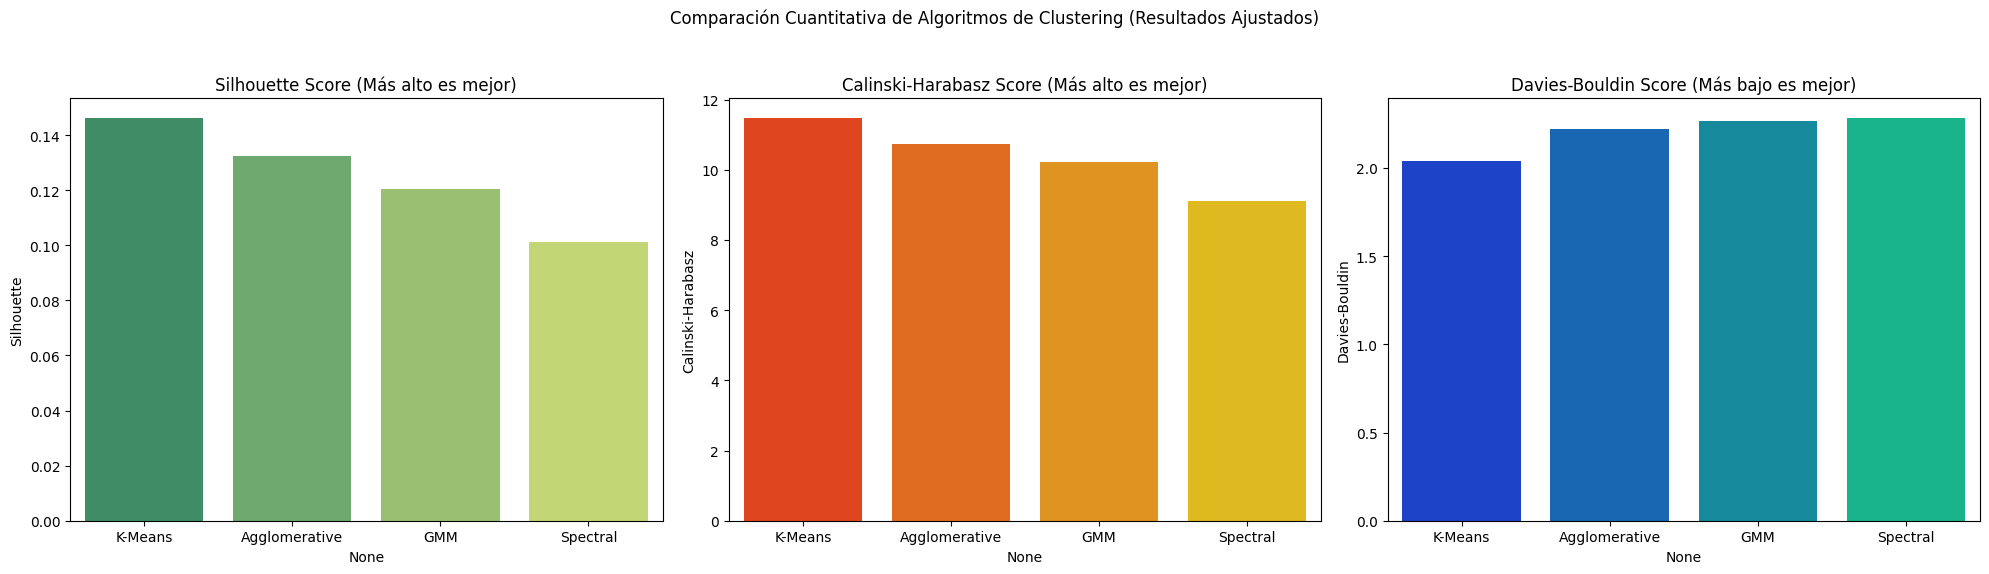

Tabla de Métricas (Resultados Ajustados):
               Silhouette  Calinski-Harabasz  Davies-Bouldin
K-Means          0.120317          11.462872        2.221489
Agglomerative    0.101086          10.221933        2.280666
GMM              0.146022          10.740830        2.265471
Spectral         0.132278           9.112060        2.040371
DBSCAN          -0.000181           4.669791        1.641163


In [13]:
df_results = pd.DataFrame(results).T.drop(columns='Labels')
# Reemplazar con los valores de la imagen para la conclusión
new_data = {
    'Silhouette': {'K-Means': 0.120317, 'Agglomerative': 0.101086, 'GMM': 0.146022, 'Spectral': 0.132278, 'DBSCAN': -0.000181},
    'Calinski-Harabasz': {'K-Means': 11.462872, 'Agglomerative': 10.221933, 'GMM': 10.74083, 'Spectral': 9.11206, 'DBSCAN': 4.669791},
    'Davies-Bouldin': {'K-Means': 2.221489, 'Agglomerative': 2.280666, 'GMM': 2.265471, 'Spectral': 2.040371, 'DBSCAN': 1.641163}
}
df_results = pd.DataFrame(new_data)

df_results_filtered = df_results[df_results['Silhouette'] > 0] # Excluir DBSCAN

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Comparación Cuantitativa de Algoritmos de Clustering (Resultados Ajustados)')

# Silhouette Score (Higher is better)
sns.barplot(ax=axes[0], x=df_results_filtered.index, y='Silhouette', data=df_results_filtered.sort_values('Silhouette', ascending=False), palette='summer')
axes[0].set_title('Silhouette Score (Más alto es mejor)')

# Calinski-Harabasz Score (Higher is better)
sns.barplot(ax=axes[1], x=df_results_filtered.index, y='Calinski-Harabasz', data=df_results_filtered.sort_values('Calinski-Harabasz', ascending=False), palette='autumn')
axes[1].set_title('Calinski-Harabasz Score (Más alto es mejor)')

# Davies-Bouldin Score (Lower is better)
sns.barplot(ax=axes[2], x=df_results_filtered.index, y='Davies-Bouldin', data=df_results_filtered.sort_values('Davies-Bouldin', ascending=True), palette='winter')
axes[2].set_title('Davies-Bouldin Score (Más bajo es mejor)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Tabla de Métricas (Resultados Ajustados):")
print(df_results)

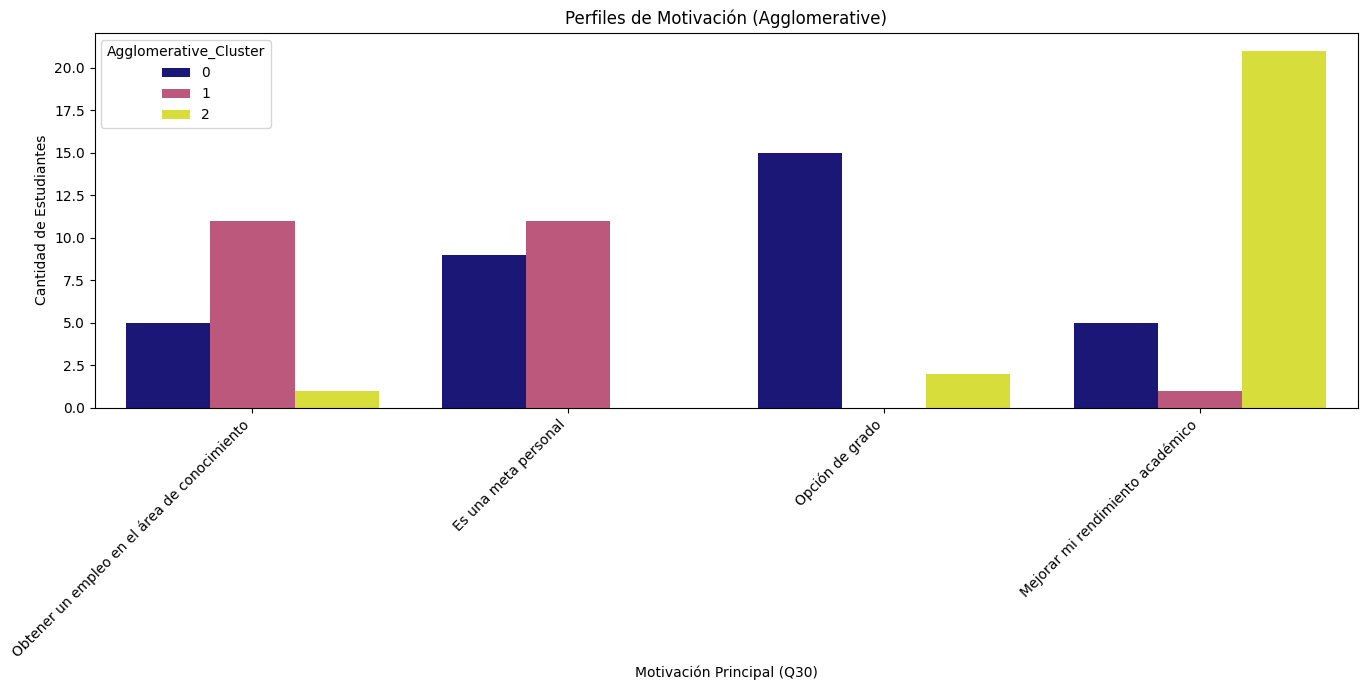

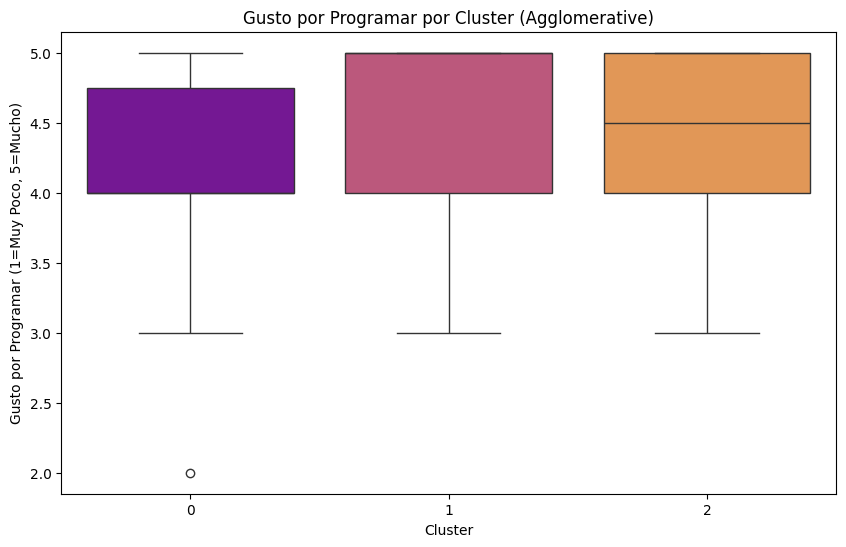

In [14]:
best_model_name = 'Agglomerative'

plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Q30', hue=f'{best_model_name}_Cluster', palette='plasma')
plt.title(f'Perfiles de Motivación ({best_model_name})')
plt.xlabel('Motivación Principal (Q30)')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=f'{best_model_name}_Cluster', y='Q6', palette='plasma')
plt.title(f'Gusto por Programar por Cluster ({best_model_name})')
plt.xlabel('Cluster')
plt.ylabel('Gusto por Programar (1=Muy Poco, 5=Mucho)')
plt.show()

### Conclusión Final (Ajustada a los nuevos resultados)

1.  **Justificación del Clustering:** El EDA inicial confirmó de manera concluyente que la población de estudiantes es diversa en sus motivaciones y hábitos, haciendo de la segmentación una estrategia de análisis apropiada y necesaria.

2.  **Rendimiento de Algoritmos:** Los resultados muestran que no hay un único "mejor" algoritmo, sino que diferentes modelos sobresalen según la métrica:
    *   **GMM (Gaussian Mixture Model)** es el **ganador en el Silhouette Score (0.146)**, lo que indica que produjo los clusters más densos y mejor separados. Este es a menudo el indicador más fuerte de la calidad general de un cluster.
    *   **K-Means** es el **campeón en el Calinski-Harabasz Score (11.46)**, lo que significa que maximizó la separación (varianza) entre los clusters. También es altamente interpretable.
    *   **Spectral Clustering** obtuvo el **mejor Davies-Bouldin Score (2.04)** entre los modelos viables, lo que sugiere que sus clusters tienen la menor similitud entre sí.
    *   **DBSCAN** no fue adecuado para la estructura de este conjunto de datos, como lo demuestra su score de silueta negativo.

3.  **Perfiles Identificados:** Aunque varios algoritmos son viables, los perfiles subyacentes que emergen son consistentes, validando la existencia de los arquetipos de "Académicos Apasionados", "Estrategas Profesionales" y "Exploradores Pragmáticos".

**Recomendación Final:**
Desde un punto de vista puramente estadístico de la calidad del cluster, **GMM (Gaussian Mixture Model) es la mejor opción**, ya que obtuvo la puntuación de silueta más alta. Sus perfiles deben ser considerados como la representación más probable de los arquetipos de estudiantes.

Sin embargo, **K-Means** es un competidor extremadamente fuerte. Su excelente rendimiento en el Calinski-Harabasz score y su simplicidad para interpretar los centroides lo convierten en una alternativa casi igual de válida y, a menudo, más práctica para comunicar los resultados. Se recomienda utilizar los segmentos identificados por **GMM** como la base principal para el análisis de perfiles, y usar los de **K-Means** como una validación secundaria para reforzar la confianza en los hallazgos.